<a href="https://colab.research.google.com/github/maxmartin8/AI-Capstone-Project/blob/main/MaxCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Data

# 
# Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
# Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
# Sample submission file contains the format in which we have to submit out predictions
# Importing Library

import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split #creating train and test splits
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data
# Reading the training dataset in a dataframe using Pandas
train = pd.read_csv("/content/drive/MyDrive/2020_bexar.csv")
train.head()



,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,...,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,45-54,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,72200,163,2331,2763,11
1,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,72200,138,1558,1968,42
2,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,72200,109,1020,1583,39
3,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
4,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,72200,70,1187,2012,14


In [3]:
pip install plotly-geo

     |████████████████████████████████| 23.7 MB 1.6 MB/s 


In [4]:
# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("/content/drive/MyDrive/2020_bexar.csv")
test.head()


,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,...,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802917e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,1,1,2,2,2,335000,NaN,3.875,NaN,3,6266.76,NaN,2069.84,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,45-54,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7751,56.84,72200,163,2331,2763,11
1,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802918e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,325000,NaN,3.0,NaN,2,2662.7,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,425000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4610,42.69,72200,138,1558,1968,42
2,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802912e+10,C,VA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,3,31,1,2,2,2,215000,NaN,2.25,NaN,2,4033.44,NaN,1346.04,NaN,NaN,360,NaN,NaN,2,2,2,2,215000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4664,63.14,72200,109,1020,1583,39
3,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802919e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,1,31,1,2,2,2,315000,NaN,3.0,NaN,2,1868.5,NaN,0.0,NaN,NaN,360,NaN,NaN,2,2,2,2,475000,1,...,3,4,7.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,3,4,4,5,3,4,35-44,9999,No,NaN,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,11921,45.05,72200,166,2193,2564,12
4,2020,254900HA4DQWAE0W3342,41700,TX,48029,4.802916e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,6,0,2,2,1,1,2,2,2,185000,NaN,4.0,NaN,3,7610.72,NaN,1595.0,NaN,NaN,360,NaN,NaN,2,2,2,2,185000,1,...,3,3,7.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,3,3,4,4,3,3,35-44,35-44,No,No,3,3,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,7623,85.54,72200,70,1187,2012,14


In [5]:
# Let’s make a copy of the train and test data so that even if we have to make any changes 
# in these datasets we would not lose the original datasets.
train_original=train.copy()
test_original=test.copy()

In [6]:
# Understanding the data
train.dtypes

activity_year                         int64
lei                                  object
derived_msa_md                        int64
state_code                           object
county_code                           int64
                                      ...  
ffiec_msa_md_median_family_income     int64
tract_to_msa_income_percentage        int64
tract_owner_occupied_units            int64
tract_one_to_four_family_homes        int64
tract_median_age_of_housing_units     int64
Length: 99, dtype: object

We have 145273 rows and 99 columns in the train dataset.


In [7]:
train.shape

(145273, 99)

In [8]:
test.shape

(145273, 99)

In [9]:
# The action taken on the covered loan or application
#Values:

#    1 - Loan originated
#    2 - Application approved but not accepted
#    3 - Application denied
#    4 - Application withdrawn by applicant
#    5 - File closed for incompleteness
#    6 - Purchased loan
#    7 - Preapproval request denied
#    8 - Preapproval request approved but not accepted

train['action_taken'].value_counts()

1    71316
6    21456
4    21099
3    17580
5     9037
2     4737
8       35
7       13
Name: action_taken, dtype: int64

In [10]:
train['action_taken'].value_counts(normalize=True)


1    0.490910
6    0.147694
4    0.145237
3    0.121014
5    0.062207
2    0.032608
8    0.000241
7    0.000089
Name: action_taken, dtype: float64

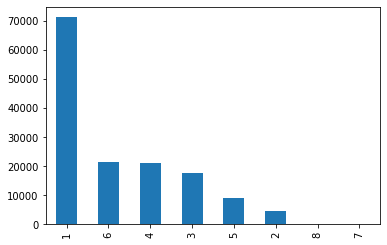

In [11]:
train['action_taken'].value_counts().plot.bar()

In [12]:
county1=pd.DataFrame(train['county_code'].value_counts())
county1=county1.reset_index()
county1.columns=['county_code', 'number of loans'] 
county1

,county_code,number of loans
0,48029,145273


In [13]:
df_notapproved=train[train['action_taken']!='1']

In [14]:
df_reason=pd.DataFrame(df_notapproved['action_taken'].value_counts())
df_reason=df_reason.reset_index()
df_reason.columns=['reason','number of loans']

In [15]:
trace0 = go.Bar(
    x=df_reason['reason'],
    y=df_reason['number of loans'],
    
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Major loan denial reasons',height=500,
                  width=700,
                  autosize=False,
                  margin=go.layout.Margin(
        l=50,
        r=50,
        b=200,
        t=100,
        pad=4
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)
    #1 - Debt-to-income ratio
    #2 - Employment history
    #3 - Credit history
    #4 - Collateral
    #5 - Insufficient cash (downpayment, closing costs)
    #6 - Unverifiable information
    #7 - Credit application incomplete
    #8 - Mortgage insurance denied
    #9 - Other
    #10 - Not applicable

In [16]:
train['income']=train['income']
test['income']=test['income']

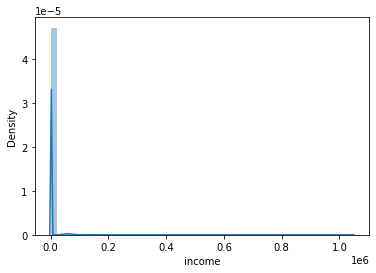

In [17]:
sns.distplot(train['income'])

In [30]:
logit1 = smf.logit("""action_taken_target ~ C(loan_type) + derived_sex 
+ derived_race + C(applicant_credit_score_type)""", data=train).fit()

Optimization terminated successfully.
         Current function value: 0.436208
         Iterations 6


In [31]:
logit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                           
===============================================================================
Dep. Variable:     action_taken_target   No. Observations:               145273
Model:                           Logit   Df Residuals:                   145249
Method:                            MLE   Df Model:                           23
Date:                 Thu, 11 Nov 2021   Pseudo R-squ.:                  0.3697
Time:                         14:38:28   Log-Likelihood:                -63369.
converged:                        True   LL-Null:                   -1.0053e+05
Covariance Type:             nonrobust   LLR p-value:                     0.000
=============================================================================================================================
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     0.9169      0.139      6.583      0.000       0.644       1.190
C(loan_type)[T.2]                                             0.5195      0.020     25.482      0.000       0.479       0.559
C(loan_type)[T.3]                                             1.1370      0.020     57.969      0.000       1.099       1.175
C(loan_type)[T.4]                                             0.1328      0.087      1.528      0.127      -0.038       0.303
derived_sex[T.Joint]                                          0.5801      0.021     27.829      0.000       0.539       0.621
derived_sex[T.Male]                                           0.0578      0.020      2.833      0.005       0.018       0.098
derived_sex[T.Sex Not Available]                             -0.5184      0.030    -17.510      0.000      -0.576      -0.460
derived_race[T.American Indian or Alaska Native]             -0.1841      0.156     -1.177      0.239      -0.490       0.122
derived_race[T.Asian]                                         0.1821      0.143      1.271      0.204      -0.099       0.463
derived_race[T.Black or African American]                     0.1856      0.141      1.317      0.188      -0.091       0.462
derived_race[T.Free Form Text Only]                          -1.4974      0.589     -2.542      0.011      -2.652      -0.343
derived_race[T.Joint]                                         0.2457      0.146      1.683      0.092      -0.040       0.532
derived_race[T.Native Hawaiian or Other Pacific Islander]     0.4889      0.195      2.507      0.012       0.107       0.871
derived_race[T.Race Not Available]                           -0.0160      0.139     -0.115      0.909      -0.289       0.257
derived_race[T.White]                                         0.2810      0.138      2.030      0.042       0.010       0.552
C(applicant_credit_score_type)[T.2]                          -0.0105      0.024     -0.438      0.661      -0.058       0.037
C(applicant_credit_score_type)[T.3]                           0.1162      0.024      4.879      0.000       0.069       0.163
C(applicant_credit_score_type)[T.4]                           0.0170      0.203      0.084      0.933      -0.382       0.416
C(applicant_credit_score_type)[T.5]                           0.0164      0.426      0.039      0.969      -0.818       0.851
C(applicant_credit_score_type)[T.6]                           0.0658      0.112      0.590      0.555      -0.153       0.284
C(applicant_credit_score_type)[T.7]                           0.6678      0.092      7.271      0.000       0.488       0.848
C(applicant_credit_score_type)[T.8]                          -1.6801      0.042    -39.705      0.000      -1.763      -1.597
C(applicant_credit_score_type)[T.9]                          -3.3220      0.021   